<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Cоотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Cоотношение-видов-объектов-общественного-питания-по-количеству-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cоотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cоотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Объекты-общественного-питания-с-сетевым-распространением" data-toc-modified-id="Объекты-общественного-питания-с-сетевым-распространением-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Объекты общественного питания с сетевым распространением</a></span></li><li><span><a href="#Характеристика-сетевых-заведений" data-toc-modified-id="Характеристика-сетевых-заведений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Характеристика сетевых заведений</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест" data-toc-modified-id="Среднее-количество-посадочных-мест-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Среднее количество посадочных мест</a></span></li><li><span><a href="#Информация-об-улице-из-столбца-address" data-toc-modified-id="Информация-об-улице-из-столбца-address-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Информация об улице из столбца address</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a></span></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания" data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

# Исследование заведений общественного питания Москвы

**Цель исследования:**
Выяснить для инвесторов текущее положение дел на рынке: будет ли кафе с официантами-роботами в Москве популярным в долгосрочной перспективе?

**Описание данных:** открытые данные о заведениях общественного питания в Москве.

   Таблица `rest_data`:

 - `id` — идентификатор объекта;
 - `object_name` — название объекта общественного питания;
 - `chain` — сетевой ресторан;
 - `object_type` — тип объекта общественного питания;
 - `address` — адрес;
 - `number` — количество посадочных мест.

**План работ:**

 - [x] Исследовать соотношение видов объектов общественного питания по количеству.
 - [x] Исследовать соотношение сетевых и несетевых заведений по количеству.
 - [x] Выяснить для какого вида объекта общественного питания характерно сетевое распространение.
 - [x] Выяснить что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
 - [x] Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Выяснить какой вид предоставляет в среднем самое большое количество посадочных мест.
 - [x] Выделить в отдельный столбец информацию об улице из столбца address.
 - [x] Построить график топ-10 улиц по количеству объектов общественного питания. Выяснить в каких районах Москвы находятся эти улицы.
 - [x] Найти число улиц с одним объектом общественного питания. Выяснить в каких районах Москвы находятся эти улицы.
 - [x] Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.
 - [x] Подготовить презентацию исследования для инвесторов.

## Обзор данных

In [1]:
pip install folium

     |████████████████████████████████| 95 kB 2.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем все необходимые библиотеки для исследования 

import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import folium
import requests
import os
import re
from matplotlib import pyplot as plt
from termcolor import colored, cprint
from io import BytesIO



%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [3]:
def import_data(pth_1, pth_2):
    """Функция загрузки данных из csv. 
    На вход функция принимает два варианта пути (локальный/сервер).
    Загрузка происходит из доступного."""
    if os.path.exists(pth_1):
        return pd.read_csv(pth_1)
    elif os.path.exists(pth_2):
        return pd.read_csv(pth_2)
    else:
        print('Загрузка данных не удалась. Что-то пошло не так.')

In [4]:
# Загружаем данные 
df = import_data('/datasets/rest_data.csv', 'D:/anaconda3/rest_data.csv')

In [5]:
def display_df(df):
    """ Функция переименует столбцы в соответствии со змеиным регистром и покажет:
    - произвольные 5 строк датафрейма
    - типы данных
    - пропуски
    - дубликаты"""
    
    def to_snake_case(name):
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('__([A-Z])', r'_\1', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        return name.lower()

    df.columns = df.columns.to_series().apply(to_snake_case)
    print('')
    cprint('Первые 5 строк датафрейма', 'green', attrs=['blink'])
    display(df.head())
    print('')
    print('')
    cprint('Типы данных', 'green', attrs=['blink'])
    print('')
    print(df.info())
    print('')
    print('')
    cprint('Пропуски', 'green', attrs=['blink'])
    print('')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, '-', df[element].isna().sum(), 'пропусков')
            count =+1
    if count == 0:
        print('Пропусков нет')
    print('')
    print('')
    cprint('Дубликаты', 'green', attrs=['blink'])
    print('')
    if df.duplicated().sum() > 0:
        print('Дубликатов:', df.duplicated().sum())
    else:
        print('Дубликатов нет')   

In [6]:
display_df(df)


Первые 5 строк датафрейма


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50




Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


Пропуски

Пропусков нет


Дубликаты

Дубликатов нет


**По итогам первичного обзора данных:**
- названия колонок приведены к змеиному регистру
- пропусков не обнаружено
- явных дубликатов не обнаружено

## Предобработка данных

In [7]:
#Напишем функцию для анализа столбцов

def category_analysis(df, bins):
    for elem in df.columns:
        print('')
        cprint(f'Уникальные значения столбца {elem}', 'blue', attrs=['blink'])
        print('')
        print(df[elem].sort_values().unique())
        print('')
        print(f'Количество: {df[elem].nunique()}')
        if df[elem].nunique() <= bins:
            plt.figure(figsize=(9,5))
            plt.hist(df[elem], bins=bins, ec='black', alpha=0.5)
            plt.xticks(rotation=45, ha='right')
            plt.title('Гистограмма парметра: {}'.format(df[elem].name))
            plt.show();
        elif df[elem].nunique() <= 315:
            plt.figure(figsize=(9,5))
            plt.hist(df[elem], bins=30, ec='black', alpha=0.5)
            plt.xticks()
            plt.title('Гистограмма парметра: {}'.format(df[elem].name))
            plt.show();
        else:
            print('')
            cprint('Гистограмму посторить невозможно, слишком много значений', 'red')


Уникальные значения столбца id

[   838   5882  19613 ... 223437 223438 223439]

Количество: 15366

Гистограмму посторить невозможно, слишком много значений

Уникальные значения столбца object_name

['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС' '1-й МОК' '100 личная столовая' ...
 'школа 775' 'школа 913' 'школа 919']

Количество: 10393

Гистограмму посторить невозможно, слишком много значений

Уникальные значения столбца chain

['да' 'нет']

Количество: 2


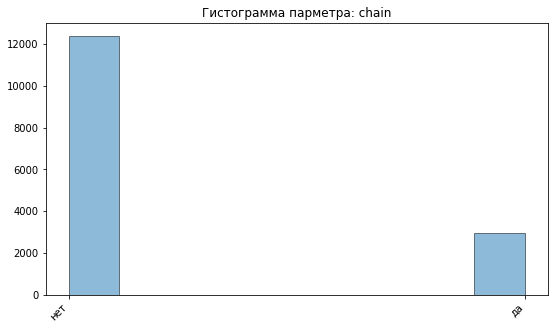


Уникальные значения столбца object_type

['бар' 'буфет' 'закусочная' 'кафе' 'кафетерий' 'магазин (отдел кулинарии)'
 'предприятие быстрого обслуживания' 'ресторан' 'столовая']

Количество: 9


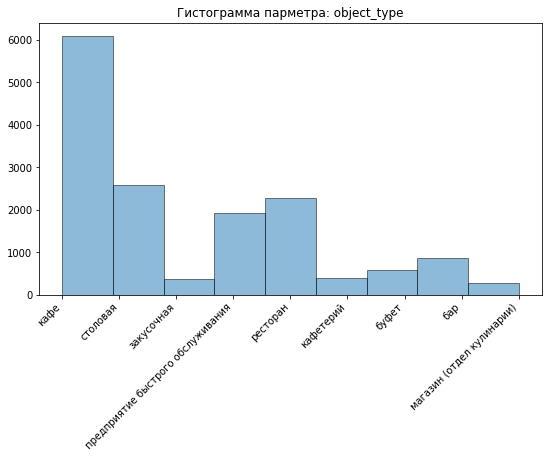


Уникальные значения столбца address

['1-й Нагатинский проезд, дом 10'
 '1-я Тверская-Ямская улица, дом 29/66, корпус 1'
 '2-я Брестская улица, дом 1, строение 1' ...
 'улица Миклухо-Маклая, дом 18' 'улица Обручева, дом 23, строение 1'
 'улица Сергея Макеева, дом 9, строение 2']

Количество: 9108

Гистограмму посторить невозможно, слишком много значений

Уникальные значения столбца number

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  118  119  1

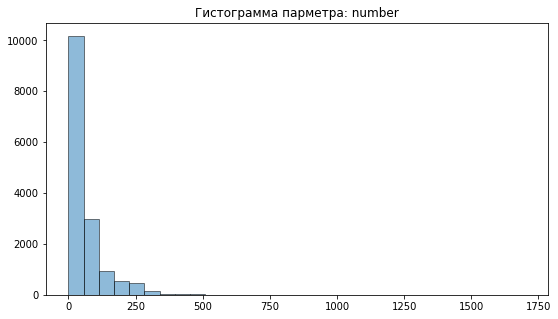

In [8]:
category_analysis(df, 9)

In [9]:
#Рассмотрим подробнее перечень наименований объектов
df['object_name'].sort_values().unique().tolist()

['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС',
 '1-й МОК',
 '100 личная столовая',
 '100 личное кафе',
 '1001 ночь',
 '100лоФФка',
 '101 вкус',
 '13 RULES',
 '13 RULES KRAFT BEER',
 '13 Rules',
 '15 Kitchen+bar',
 '18 АВТОБУСНЫЙ ПАРК',
 '19bar Atmosphere',
 '1x bet',
 '2-Й АВТОБУСНЫЙ ПАРК',
 "23'00",
 '24 Градуса',
 '259',
 '3 Skovorodki',
 '3 правила',
 '33 пингвина',
 '37-37',
 '44 Чашма',
 '495',
 '5звезд Юг 52',
 '68. ПАУЗА',
 '69 Pints Бар',
 '69 pints',
 '7 Сендвичей',
 '7 злаков',
 '7 сэндвичей-Meating',
 '7717 LOUNGE (Кальянная)',
 '8 OZ Унций',
 '8-ОЙ ТРОЛЛЕЙБУСНЫЙ ПАРК',
 '9 АВТОБУСНЫЙ ПАРК',
 '9bar',
 'ABC Coffee Roasters',
 'ACCENTI',
 'ADRY',
 'AGLOMERAT',
 'AL33 Пиццерия Бар Ботега',
 'ALOHA POKE BAR',
 'AMARSI',
 'AMG',
 'APARTAMENT Пар Бар',
 'AQKitchen',
 'ART PUB',
 'Abbey Players Irish Pub',
 'Absolem',
 'Acai Family',
 'Alex Пекарня',
 'Amande Cafe',
 'Americano Кафе',
 'Amerigos Pizza',
 'Amore Grande',
 'Amore, итальянское мороженое',
 'Amster bar snacks',
 'An Nam',
 'Andi

В столбце с наименованиями объектов общепита встречаются названия, написанные с лишними пробелами или знаками, а также одни и те же названия, которые записаны на разных языках. Возможно, это действительно разные наименования, зарегистрированные как разные юридические лица, но так же может быть, что это ошибки выгрузки/человеческий фактор при заполнении данных. Мы не можем однозначно ответить на этот вопрос и если приводить все похожие названия к единому виду, рискуем испортить данные. Будем работать с тем, что есть, зафиксировав данную проблему.

In [10]:
#Наименования из столбца object_name приведем к нижнему регистру
df['object_name'] = df['object_name'].str.lower()

In [11]:
#Проверим на неявные дубликаты, отбросив столбец с id объектов
df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

85

In [12]:
#Удалим неявные дубликаты
df = (df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])
      .reset_index(drop=True))

По итогу предобработки данных:
 - зафиксирована проблема с названиями объектов - встречаются названия, написанные с лишними пробелами или знаками, а также одни и те же названия, которые записаны на разных языках
 - наименования из столбца object_name приведены к нижнему регистру
 - удалены неявные дубликаты - 85 шт.
 - в данных преобладают несетевые заведения,
 - в данных преобладаютзаведения типа "кафе",
 - около 2/3 всех заведений имеют уникальные названия, значит, остальные - сетевые;
 - около 60% заведений имеют уникальные адреса, значит, по одному адресу могут располагаться несколько заведений. Чаще всего это фудкорты в торговых центрах;
 - количество посадочных мест в заведениях варьируется от 0 до 1700, чаще всего - до 50 мест.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

In [13]:
df_types = (df.groupby('object_type').agg(
                        count = ('id', 'count')).
                        sort_values(by='count', ascending=False).
                        reset_index())
            
display(df_types)

,object_type,count
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


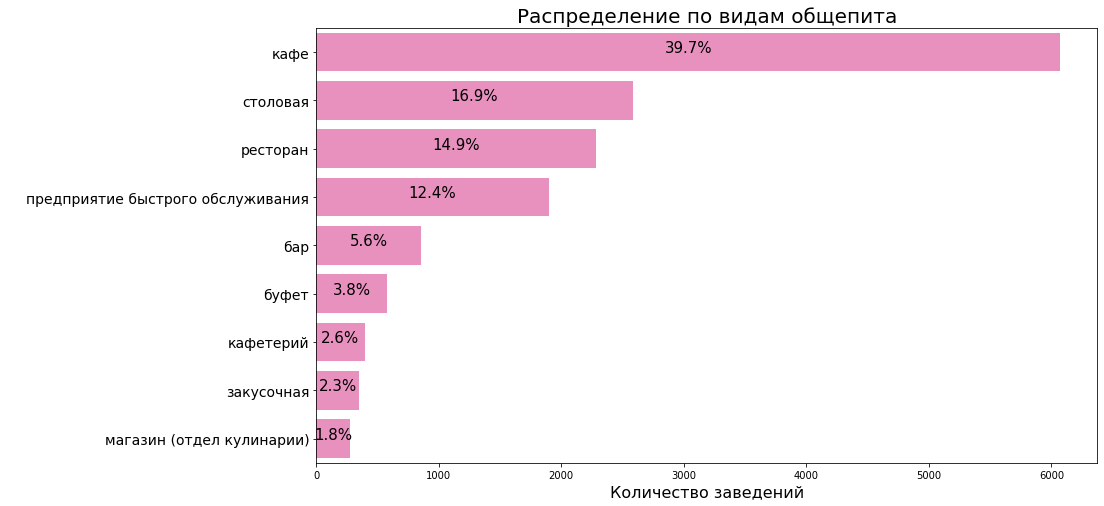

In [57]:
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-pastel')
colors = sns.color_palette('Set1')[7]
plot = sns.barplot(x='count', y='object_type', data=df_types, color=colors)
plt.title('Распределение по видам общепита', fontsize=20)
plt.xlabel('Количество заведений', fontsize=16)
plt.ylabel(' ', fontsize=16)
plt.yticks(fontsize=14)
# добавление процентов на график
total = sum(df_types['count']) # расчет общего количества объектов
for p in plot.patches: # цикл для каждого столбца графика
    width = p.get_width() # ширина
    height = p.get_height() # высота
    x, y = p.get_xy()
    percentage = '{:.1f}%'.format(100 * p.get_width() / total) # расчет процентов
        
    plot.annotate(percentage, (x + width / 2, y + height / 2), 
                  ha='center', fontsize=15) # размещение %
plt.show();

Таким образом, почти 40% от всех объектов общественного питания в г.Москва составляют кафе.

Следом с заметным отставанием идут столовые, рестораны и фастфуды.

По 2-3% приходится на кафетерии, закусочные и отделы кулинарии.

Из этого можно сделать вывод, что наиболее популярным видом общепита являются кафе, поэтому формат небольшого кафе для проекта с роботами-официантами будет наиболее привлекателен.

### Cоотношение сетевых и несетевых заведений по количеству

In [15]:
df_chains =  (df.groupby('chain').agg(
                        count = ('id', 'count')).
                        sort_values(by='count', ascending=False).
                        reset_index())
            
display(df_chains)

,chain,count
0,нет,12317
1,да,2964


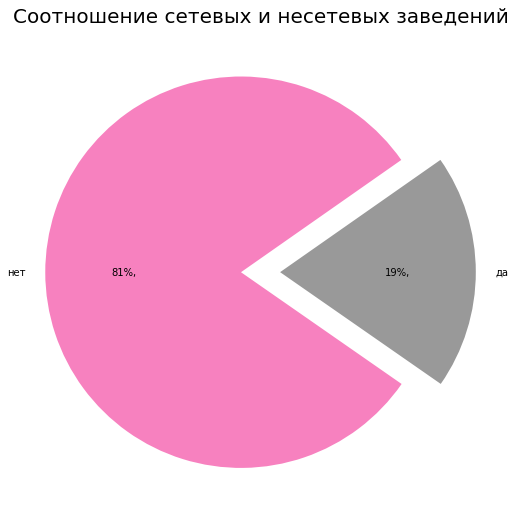

In [16]:
plt.figure(figsize=(15, 9))
explode = (0.1, 0.1)
colors = sns.color_palette('Set1')[7:9]
plt.pie(df_chains['count'], labels=df_chains['chain'], 
        labeldistance=1.1, autopct='%1.0f%%,', 
        explode = explode, startangle=35, colors=colors)
plt.title('Cоотношение сетевых и несетевых заведений', fontsize=20)
plt.show();

По итогам анализа 81% заведений общественного питания не являются сетевыми. Это является положительным марекром для входа на рынок, поскольку если бы преобладали сетевые заведения, было бы сложнее войти на рынок и конкурировать с ними из-за потребительской лояльности к сетевикам и эффекта масштаба. 

Таким образом, по соотношению сетевых и несетевых заведений, ситуация на рынке благоприятна для открытия мини-кафе с официантами-роботами.

### Объекты общественного питания с сетевым распространением

In [17]:
df_grouped = (df.groupby(['object_type', 'chain']).agg(
                                                   count = ('id', 'count'))
                                                  .sort_values(by='count', ascending=False)
                                                  .reset_index()
             )

<Figure size 1080x648 with 0 Axes>

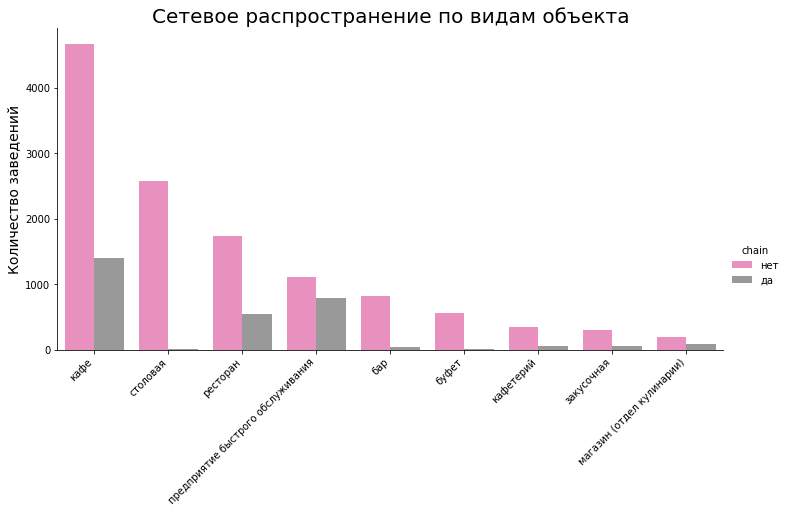

In [18]:
plt.figure(figsize=(15, 9))
color = sns.color_palette('Set1')[7:9]
ax = sns.catplot(x='object_type', y='count',
            hue='chain', kind='bar',
            data=df_grouped,
            height=5, aspect=2,
            palette=color)
plt.xticks(rotation=45, ha='right')
plt.title('Сетевое распространение по видам объекта', fontsize=20)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.show();

In [19]:
df['chain'] = df['chain'].replace('да', 1)
df['chain'] = df['chain'].replace('нет', 0)

In [20]:
df_chain_on = (df.pivot_table(index='object_type',
                             values='chain',
                             aggfunc='mean'
                             )
               .sort_values(by='chain', ascending=False)
               .style.format({'chain' : '{:.2%}'}))

df_chain_on

,chain
object_type,
предприятие быстрого обслуживания,41.54%
магазин (отдел кулинарии),28.57%
ресторан,23.79%
кафе,22.99%
закусочная,16.09%
кафетерий,13.16%
бар,4.33%
буфет,1.91%
столовая,0.12%


Из анализа видно, что сетевое распространение наиболее характерно для фастфудов - 42% предприятий быстрого обслуживания являются сетевыми.

Также 20-30% кулинарий, ресторанов и кафе являются сетевыми.

Сетевое распространение наименее характерно для баров, буфетов и столовых - менее 5% таких заведений являются сетевыми.

Таким образом, по анализу объектов общественного питания с сетевым распространением можно сделать вывод, что ситуация на рынке благоприятна для открытия мини-кафе с официантами-роботами, поскольку лишь 23% кафе на рынке являются сетевыми, это не будет создавать дополнительных трудностей при входе на рынок и дальнейшей конкуренции за потребителя.

### Характеристика сетевых заведений

In [94]:
df_corr = (df.query('chain == 1').groupby('object_name')
                          .agg(
                          count = ('id', 'count'),
                          avg_seats = ('number', 'mean'))
                          .sort_values(by='count', ascending=False)
                          .reset_index())
df_corr = df_corr.query('count != 1')
df_corr.head(5)

,object_name,count,avg_seats
0,шоколадница,157,57.18
1,kfc,155,55.34
2,макдоналдс,150,87.70
3,бургер кинг,137,46.65
4,теремок,94,25.61


In [93]:
#Посмотрим на характеристики распределений
df_corr.describe()

,count,avg_seats
count,246.00,246.00
mean,10.70,56.87
std,22.64,47.30
min,2.00,0.00
25%,2.00,20.00
50%,4.00,44.25
75%,7.00,85.00
max,157.00,245.00


In [98]:
# Сохраним средние значения
count_mean = df_corr['count'].mean()
seats_mean = df_corr['avg_seats'].mean()

In [99]:
#Напишем функцию для категоризации заведений

def categorizer(row):
    if row['count'] < count_mean and row['avg_seats'] < seats_mean:
        return 'Мало заведений и мало посадочных мест'
    if row['count'] < count_mean and row['avg_seats'] > seats_mean:
        return 'Мало заведений и много посадочных мест'
    if row['count'] > count_mean and row['avg_seats'] > seats_mean:
        return 'Много заведений и много посадочных мест'
    return 'Много заведений и мало посадочных мест'

In [100]:
df_corr['category'] = df_corr.apply(categorizer, axis=1)

In [101]:
df_corr.head()

,object_name,count,avg_seats,category
0,шоколадница,157,57.18,Много заведений и мало посадочных мест
1,kfc,155,55.34,Много заведений и мало посадочных мест
2,макдоналдс,150,87.70,Много заведений и много посадочных мест
3,бургер кинг,137,46.65,Много заведений и мало посадочных мест
4,теремок,94,25.61,Много заведений и мало посадочных мест


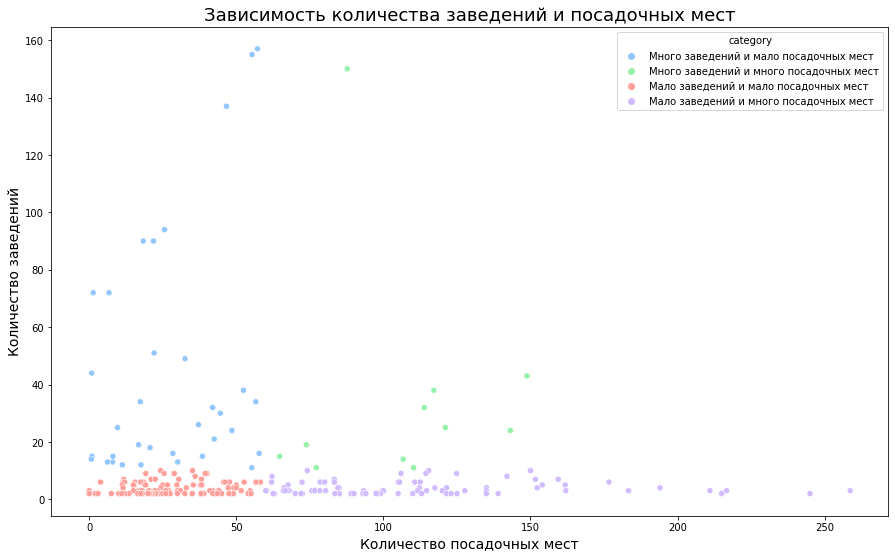

In [102]:
plt.rcParams["figure.figsize"] = [15, 9]
sns.scatterplot(x='avg_seats', y='count', hue='category', data=df_corr)
plt.title('Зависимость количества заведений и посадочных мест', fontsize=18)
plt.xlabel('Количество посадочных мест', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.show();

Как видно из графика, для сетевиков характерно иметь мало заведений с небольшим числом посадочных мест в каждом. Скорее всего, такой формат наиболее оптимален для большего охвата потребителей из разных районов и экономии на обслуживании. 

Если в долгосрочной перспективе планируется расширение до сети мини-кафе с официантами-роботами, стоит присмотреться к такому формату.

### Среднее количество посадочных мест

In [103]:
#Посмотрим распределение посадочных мест
df['number'].describe()

count   15281.00
mean       59.79
std        74.84
min         0.00
25%        14.00
50%        40.00
75%        80.00
max      1700.00
Name: number, dtype: float64

Среднее больше медианы, значит, распределение смещено вправо и имеет много выбросов. В данном случае медиана будет более корректной мерой центральной тенденции, в расчетах среднего количества посадочных мест будем использовать медиану.

In [107]:
df_numbers = (df.groupby('object_type')
              .agg(
              mean_seats = ('number', 'mean'),
              median_seats = ('number', 'median'))
              .sort_values(by='mean_seats', ascending=False)
              .reset_index())
df_numbers

,object_type,mean_seats,median_seats
0,столовая,130.34,103
1,ресторан,96.88,80
2,буфет,51.43,32
3,бар,43.53,35
4,кафе,39.79,30
5,предприятие быстрого обслуживания,20.81,6
6,кафетерий,9.18,6
7,закусочная,7.85,0
8,магазин (отдел кулинарии),5.59,0


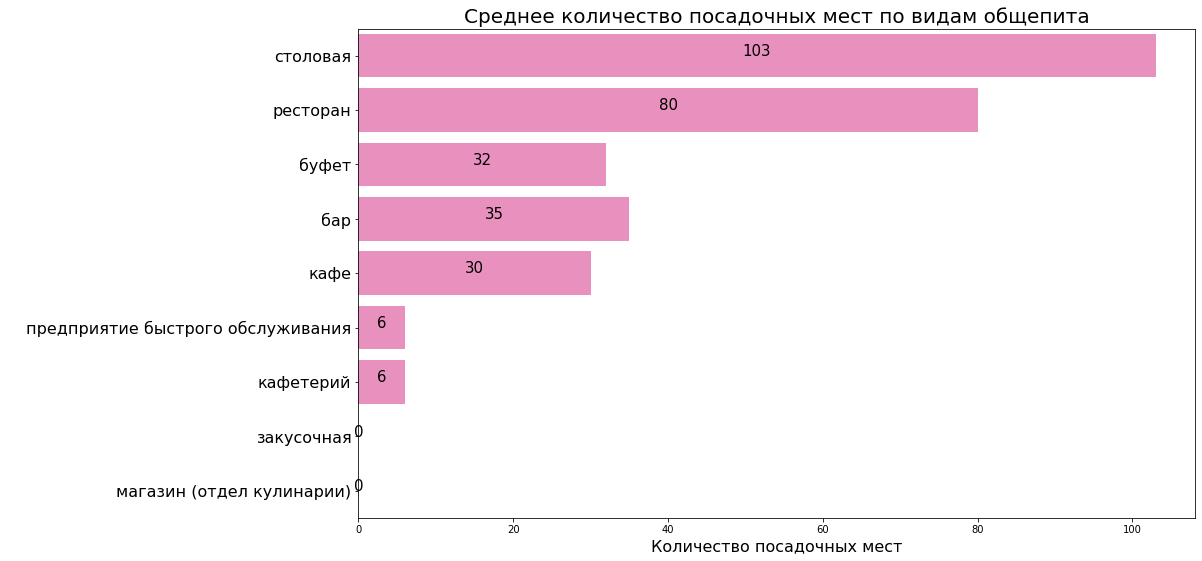

In [110]:
plt.figure(figsize=(15, 9))
colors = sns.color_palette('Set1')[7]
plot = sns.barplot(x='median_seats', y='object_type', data=df_numbers, color=colors)
plt.yticks(fontsize=16)
plt.title('Среднее количество посадочных мест по видам общепита', fontsize=20)
plt.xlabel('Количество посадочных мест', fontsize=16)
plt.ylabel(' ', fontsize=16)
# добавление значений на график
for p in plot.patches: # цикл для каждого столбца графика
    width = p.get_width() # ширина
    height = p.get_height() # высота
    x, y = p.get_xy()
    meaning = '{:.0f}'.format(width)
    plot.annotate(meaning, (x + width / 2, y + height / 2), 
                  ha='center', fontsize=15) # размещение %
plt.show();

По среднему количеству посадочных мест лидируют столовые - 103 посадочных мест в среднем.

На рестораны в среднем приходится 80 посадочных мест.

На буфеты, бары и кафе - 30-35 посадочных мест в среднем.

Для выбранного формата мини-кафе для проекта с роботами-официантами следует рассмотреть 30 и менее посадочных мест.

### Информация об улице из столбца address

In [25]:
# Создаем новый датафрейм, в котором каждому столбцу соответствует элемент адреса, разделенный ','
new_df = df['address'].str.split(',',expand=True)

In [26]:
new_df

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15276,город Москва,3-й Крутицкий переулок,дом 18,None,None,None,None
15277,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15278,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15279,город Москва,поселение Московский,Киевское шоссе,22-й километр,домовладение 4,строение 1,None


In [27]:
# Напишем функцию, которая отбирает элементы, присущие для категории "улица"
def find_street(row):
    if 'улица' in row:
        return row
    elif 'шоссе' in row:
        return row
    elif 'проспект' in row:
        return row
    elif 'бульвар' in row:
        return row
    elif 'площадь' in row:
        return row
    elif 'аллея' in row:
        return row
    elif 'проезд' in row:
        return row
    elif 'переулок' in row:
        return row
    return None

In [28]:
#Отберем нужные столбцы, в которых есть наименования улиц
new_df = new_df[[1, 2, 3]]

In [29]:
#Заполним пропуски чтобы функция работала корректно
new_df = new_df.fillna('')

In [30]:
#Сохраним в столбце 4 улицы из столбца 2
new_df[4] = new_df[2].apply(find_street)

In [31]:
#Сохраним в столбце 5 улицы из столбца 3
new_df[5] = new_df[3].apply(find_street)

In [32]:
#В пропущенных строках столбца 5 проставим значения из столбца 4
new_df.loc[new_df[5].isna(), 5] = new_df[4]

In [33]:
#В пропущенных строках столбца 5 проставим значения из столбца 1
new_df.loc[new_df[5].isna(), 5] = new_df[1]

In [34]:
#Проверим не осталось ли пропусков
new_df[5].isna().sum()

0

In [35]:
df['street'] = new_df[5]

In [36]:
df

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,1,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15276,208537,шоколадница,1,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15277,209264,шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15278,209186,шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15279,221900,шоколадница,1,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


В столбец `street` выделена информация об улице заведения из столбца `address`.

In [37]:
# код ревьюера
# создаем функцию для выборки наименований улиц (ищет ключевые слова)
def street_name(address):
    for address_part in address.split(','):
        if any(word in address_part for word in list_street):
            return address_part

# создание столбца с названием улиц
data['street_name'] = data['address'].apply(street_name)
data

NameError: name 'data' is not defined

In [112]:
list_street = ['проезд','пр.','прзд.','шоссе','шос.','ш.','улица','ул.','переулок','пер.', \
               'микрорайон', 'мкр.','мкрн.', 'мкад','автодороги','деревня','проспект','пр.', \
               'площадь','пл','село','аллея', 'бульвар', 'набережная','наб.','тупик','линия', \
               'территория','квартал','просек', 'вблизи', 'парк','мост']

In [114]:
# создаем функцию для выборки наименований улиц (ищет ключевые слова)
def street_name(address):
    for address_part in address.split(','):
        if any(word in address_part for word in list_street):
            return address_part

# создание столбца с названием улиц
df['street_name'] = df['address'].apply(street_name)
df.head()

,id,object_name,chain,object_type,address,number,street,street_name
0,151635,сметана,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,улица Егора Абакумова
1,77874,родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,улица Талалихина
2,24309,кафе «академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Абельмановская улица
3,21894,пиццетория,1,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Абрамцевская улица
4,119365,кафе «вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Абрамцевская улица


### Топ-10 улиц по количеству объектов общественного питания

На сайте портала открытых данных Правительства Москвы представлены данные по общественному питанию г.Москвы, воспользуемся ими для получения информации о районе Москвы и координат объектов общественного питания.

In [ ]:
spreadsheet_id = '1DO1r4aK-7riAl4qlkSa7C_EJvUAkI47Tu6LOLX_jfRk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))

In [ ]:
data.head()

In [ ]:
# удалим первую строку, дублирующую наименования столбцов на русском языке
data = data.drop(axis=0, index=0)

In [ ]:
# функция для приведения названий столбцов к змеиному регистру
def to_snake_case(name):
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('__([A-Z])', r'_\1', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        return name.lower()

In [ ]:
# приведем названия столбцов к змеиному регистру
data.columns = data.columns.to_series().apply(to_snake_case)

In [ ]:
# оставим нужные столбцы
data = data[['id', 'district', 'adm_area', 'longitude_wgs84', 'latitude_wgs84']]

In [ ]:
# Избавимся от ведущих нулей в стообце ID
data['id'] = [s.lstrip("0") for s in data['id']]

In [ ]:
# поменяем тип данных на int
data['id'] = data['id'].astype(int)

In [ ]:
# объединим с основной таблицей df по id
df = df.merge(data, on='id', how='left')

In [ ]:
df.head()

In [ ]:
df.info()

Около 50% значений в столбцах с новыми данными пропущены, значит, на сайте портала открытых данных Правительства Москвы представлена информация не по всем интересующим нас объектам общепита. Имеющейся информации должно быть достаточно для определения районов, в которых находятся улицы с максимальным количеством объектов общепита.

In [ ]:
# Выделим топ-10 улиц по количетсву объектов общепита
df_streets = df.groupby('street')['id'].count().reset_index()
df_streets_top = df_streets.sort_values(by='id', ascending=False).head(10)
df_streets_top

In [ ]:
# Посмотрим в каких районах находятся эти улицы, 
# для этого объединим таблицу с основной таблицей df
df_streets_top = df_streets_top.merge(df[['street', 'district']], on='street', how='left')

In [ ]:
df_streets_top = (df_streets_top.dropna()
                                .drop_duplicates().reset_index(drop = True))
df_streets_top

In [ ]:
df_streets_top['district'].sort_values().unique()

Как видно из таблицы, улицы из топ-10 очень длинные и входят в состав сразу нескольких районов г.Москвы. Для иллюстрации этих улиц с объектами общепита на карте г.Москвы воспользуемся библиотекой folium.

In [ ]:
# поменяем тип данных на float
df['longitude_wgs84'] = df['longitude_wgs84'].astype(float)
df['latitude_wgs84'] = df['latitude_wgs84'].astype(float)

In [ ]:
moscow = folium.Map(location= [df['latitude_wgs84'].mean(), df['longitude_wgs84'].mean()], 
                 zoom_start = 11)
top_streets = df_streets_top['street'].unique() # выделим топ-10 улицы по количеству объектов общепита
df_map_1 = df[df['street'].isin(top_streets)].dropna() # отфильтруем таблицу по этим улицам
latitudes = df_map_1['latitude_wgs84'] # выделим широту объектов на этих улицах
longitudes = df_map_1['longitude_wgs84'] # выделим долготу объектов на этих улицах
for lat, lng in zip(latitudes, longitudes): # добавим маркеры этих объектов на карту Москвы
    folium.Marker([lat, lng]).add_to(moscow)
moscow

Как видно из илюстрации, улицы с максимальным количеством заведений общепита очень длинные и входят в состав сразу нескольких районов Москвы. Характерно, что заведения на этих улицах расположены за Садовым кольцом, в центре города нет улиц с такой концентрацией заведений общепита. 

Следовательно, для размещения мини-кафе с официантами-роботами следует рассмотреть либо центральные улицы, где меньше концентрация заведений общепита и, следовательно, меньше конкуренции, либо те улицы за пределами Садового кольца, где имеется меньшее количество заведений.

### Улицы с одним объектом общественного питания

In [ ]:
df_streets_one = df_streets.query('id == 1').reset_index(drop=True)
df_streets_one.head()

In [ ]:
len(df_streets_one)

Согласно данным таблицы, 605 улиц в г.Москва имеют по 1 объекту общепита.

In [ ]:
# Посмотрим в каких районах находятся эти улицы, 
# для этого объединим таблицу с основной таблицей df
df_streets_one = df_streets_one.merge(df[['street', 'district']], on='street', how='left')

In [ ]:
df_streets_one = (df_streets_one.dropna()
                                .drop_duplicates().reset_index(drop = True))
df_streets_one['district'].sort_values().unique()

С помощью библиотеки plotly покажем на карте г.Москвы объекты, которые являются единственными объектами общепита на своей улице.

In [ ]:
one_streets = df_streets_one['street'] # выделим улицы с 1 объектом общепита
df_map_2 = df[df['street'].isin(one_streets)].dropna() # отфильтруем таблицу по этим улицам
fig = px.scatter_mapbox(df_map_2, lat="latitude_wgs84", lon="longitude_wgs84", 
                        hover_name="object_name", hover_data=["address", "number"],
                        zoom=9, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

605 улиц в г.Москва имеют по одному объекту общепита. В большей степени они сконцентрированы в центре города. Стоит проанализировать эти улицы на наличие в них крупных жилых комплексов и бизнес-центров, чтобы закрыть потребности жителей/работников в предоставлении услуг общественного питания. Размещение мини-кафе с официантами-роботами будет более рационально на этих улицах ввиду меньшей конкуренции вследствие меньшей концентрации заведений на этих улицах.

## Общие выводы

В ходе исследования заведений общественного питания г.Москвы проанализированы открытые данные о заведениях общественного питания в г.Москва.

По итогу предобработки данных:
 - зафиксирована проблема с названиями объектов - встречаются названия, написанные с лишними пробелами или знаками, а также одни и те же названия, которые записаны на разных языках
 - удалены неявные дубликаты - 82 шт.
 - в данных преобладают несетевые заведения,
 - в данных преобладаютзаведения типа "кафе",
 - около 2/3 всех заведений имеют уникальные названия, значит, остальные - сетевые;
 - около 60% заведений имеют уникальные адреса, значит, по одному адресу могут располагаться несколько заведений. Чаще всего это фудкорты в торговых центрах;
 - количество посадочных мест в заведениях варьируется от 0 до 1700, чаще всего - до 50 мест.
 
**Cоотношение видов объектов общественного питания по количеству**
 
Почти 40% от всех объектов общественного питания в г.Москва составляют кафе.

Следом с заметным отставанием идут столовые, рестораны и фастфуды.

Из этого можно сделать вывод, что наиболее популярным видом общепита являются кафе, поэтому формат небольшого кафе для проекта с роботами-официантами будет наиболее привлекателен.

 **Cоотношение сетевых и несетевых заведений по количеству**
 
 81% заведений общественного питания не являются сетевыми. Это является положительным марекром для входа на рынок, поскольку если бы преобладали сетевые заведения, было бы сложнее войти на рынок и конкурировать с ними из-за потребительской лояльности к сетевикам и эффекта масштаба.

Таким образом, по соотношению сетевых и несетевых заведений, ситуация на рынке благоприятна для открытия мини-кафе с официантами-роботами.

 **Объекты общественного питания с сетевым распространением**
 
 Сетевое распространение наиболее характерно для фастфудов - 42% предприятий быстрого обслуживания являются сетевыми.

Также 20-30% кулинарий, ресторанов и кафе являются сетевыми.

Таким образом, по анализу объектов общественного питания с сетевым распространением можно сделать вывод, что ситуация на рынке благоприятна для открытия мини-кафе с официантами-роботами, поскольку лишь 23% кафе на рынке являются сетевыми, это не будет создавать дополнительных трудностей при входе на рынок и дальнейшей конкуренции за потребителя.
 
 **Характеристика сетевых заведений** 
 
 Для сетевиков характерно иметь мало заведений с небольшим числом посадочных мест в каждом. Скорее всего, такой формат наиболее оптимален для большего охвата потребителей из разных районов и экономии на обслуживании.

Если в долгосрочной перспективе планируется расширение до сети мини-кафе с официантами-роботами, стоит присмотреться к такому формату.

 **Среднее количество посадочных мест**
 
 По среднему количеству посадочных мест лидируют столовые - 103 посадочных мест в среднем.

На рестораны в среднем приходится 80 посадочных мест.

На буфеты, бары и кафе - 30-35 посадочных мест в среднем.

Для выбранного формата мини-кафе для проекта с роботами-официантами следует рассмотреть 30 и менее посадочных мест.

 **Топ-10 улиц по количеству объектов общественного питания**
 
 Улицы с максимальным количеством заведений общепита очень длинные и входят в состав сразу нескольких районов Москвы. Характерно, что заведения на этих улицах расположены за Садовым кольцом, в центре города нет улиц с такой концентрацией заведений общепита.

Следовательно, для размещения мини-кафе с официантами-роботами следует рассмотреть либо центральные улицы, где меньше концентрация заведений общепита и, следовательно, меньше конкуренции, либо те улицы за пределами Садового кольца, где имеется меньшее количество заведений.

 **Улицы с одним объектом общественного питания**
 
 605 улиц в г.Москва имеют по одному объекту общепита. В большей степени они сконцентрированы в центре города. Стоит проанализировать эти улицы на наличие в них крупных жилых комплексов и бизнес-центров, чтобы закрыть потребности жителей/работников в предоставлении услуг общественного питания. Размещение мини-кафе с официантами-роботами будет более рационально на этих улицах ввиду меньшей конкуренции вследствие меньшей концентрации заведений на этих улицах.
 

## Презентация

https://drive.google.com/file/d/1KYpUSnhJ7iPde7Mpko4wVpMWgj_CKxNh/view?usp=sharing